```{contents}
```

# Cost Functions

A **cost function** measures how well a regression line fits the data. It calculates the error (difference between predicted and actual values).
The **goal** is to find parameters ($\theta_0, \theta_1, ...$) that **minimize** this cost.

---

## Mean Squared Error (MSE)

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
$$

* **Most common cost function** for linear regression.
* Squares the errors → **penalizes large errors heavily**.
* Smooth and differentiable → great for gradient descent.

✅ Pros:

* Convex function → guarantees global minimum.
* Emphasizes large errors (good for minimizing outliers’ impact in general trend fitting).

❌ Cons:

* **Sensitive to outliers** → a single extreme point can distort results.

---

## Mean Absolute Error (MAE)

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m |h_\theta(x^{(i)}) - y^{(i)}|
$$

* Takes absolute differences instead of squaring.
* Errors are treated equally (linear penalty).

✅ Pros:

* **Robust to outliers** (doesn’t blow up error).
* Simple interpretation (average error in same units as data).

❌ Cons:

* Not differentiable at zero (gradient descent is trickier, though solvable with subgradients).
* Optimization can be slower.

---

## Huber Loss (Combination of MSE and MAE)

$$
J(\theta) =
\begin{cases} 
\frac{1}{2}(h_\theta(x) - y)^2 & \text{if } |h_\theta(x) - y| \leq \delta \\
\delta \cdot |h_\theta(x) - y| - \frac{1}{2}\delta^2 & \text{otherwise}
\end{cases}
$$

* Uses **MSE for small errors** (smooth) and **MAE for large errors** (robust to outliers).

✅ Pros:

* Best of both worlds: smooth optimization + outlier resistance.
* Widely used in **robust regression**.

❌ Cons:

* Need to choose hyperparameter $\delta$.

---

## Log-Cosh Loss

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \log \left( \cosh(h_\theta(x^{(i)}) - y^{(i)}) \right)
$$

* Behaves like **MSE for small errors** and like **MAE for large errors** (but smoother).

✅ Pros:

* Smooth everywhere (better for gradient descent).
* Less sensitive to outliers than MSE.

❌ Cons:

* Computationally more expensive than MSE.

---

## Quantile Loss (Pinball Loss)

$$
J(\theta) = \sum_{i=1}^m 
\begin{cases}
q \cdot (y^{(i)} - h_\theta(x^{(i)})) & \text{if } y^{(i)} \geq h_\theta(x^{(i)}) \\
(1-q) \cdot (h_\theta(x^{(i)}) - y^{(i)}) & \text{otherwise}
\end{cases}
$$

* Used in **quantile regression** (instead of predicting mean, predicts quantiles like median, 90th percentile).
* For $q=0.5$, it reduces to **MAE** (median regression).

✅ Pros:

* Useful for risk-sensitive domains (finance, forecasting).

❌ Cons:

* More complex interpretation.

---

## Impact of Cost Functions

* **MSE** → great for general regression, but heavily penalizes outliers.
* **MAE** → robust to outliers but optimization harder.
* **Huber / Log-Cosh** → balance between robustness and efficiency.
* **Quantile Loss** → gives flexibility beyond "average prediction".

---

👉 In **standard linear regression**, we almost always use **MSE** because:

* It’s mathematically elegant (derivative gives closed-form solution).
* Convex → guarantees global minimum.
* Easy to optimize with **gradient descent** or **normal equation**.

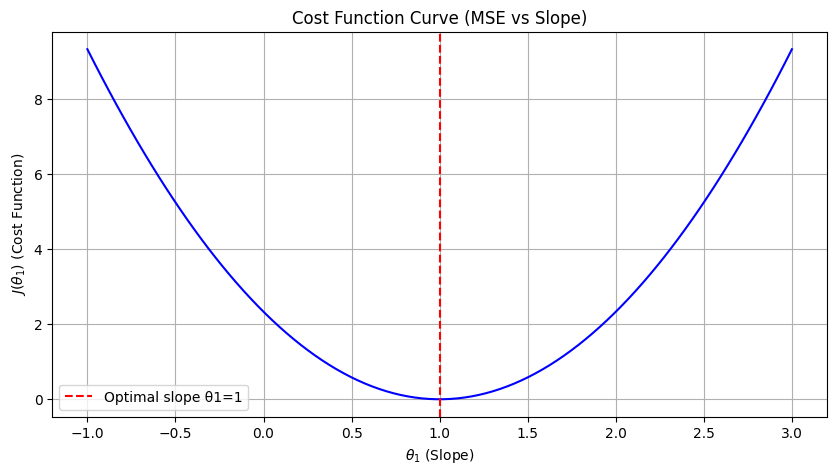

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (simple linear data)
X = np.array([1, 2, 3])
y = np.array([1, 2, 3])
m = len(y)

# Hypothesis function h(x) = theta1 * x (assuming theta0 = 0 for simplicity)
def hypothesis(theta1, X):
    return theta1 * X

# Cost function J(theta1)
def cost(theta1, X, y):
    return (1/(2*m)) * np.sum((hypothesis(theta1, X) - y) ** 2)

# Generate values of theta1 to test
theta1_vals = np.linspace(-1, 3, 100)
J_vals = [cost(t, X, y) for t in theta1_vals]

# Plot the cost function curve
plt.figure(figsize=(10,5))
plt.plot(theta1_vals, J_vals, color='blue')
plt.xlabel(r"$\theta_1$ (Slope)")
plt.ylabel(r"$J(\theta_1)$ (Cost Function)")
plt.title("Cost Function Curve (MSE vs Slope)")
plt.axvline(x=1, color='red', linestyle="--", label="Optimal slope θ1=1")
plt.legend()
plt.grid(True)
plt.show()
